# KMeans

Some Links :- https://www.youtube.com/watch?v=YWgcKSa_2ag&t=238s
    
https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
    
https://stackabuse.com/k-means-clustering-with-scikit-learn/

https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

In [ ]:
#KMeans clustering is unsupervised ML. Initially two centriod(or mean) points are assigned randomly.
#Find out distance between every point to mentioned two centriod. This process continued till repositioning stops. 
#Example if we assume k1 is 7 and k2 is 25 then mean of that cluster is same then we will have to stop.

#KMeans clustering works on distance measures.

#Clustering - Hierarchical Clustering and Partioning(Centriod) clustering.
#Partioning clustering - Kmeans and Fuzzy C mean
#Hierarchical Clustering (Tree Structure) - Divisive (Top Down Approach) and Agglomeritive (Bottom up approach)

#in K means object cannot belongs to more than one clusters but in fuzzy it can belong to one and more clusters.
# We will use the Euclidean distance measure for Kmeans. It is SQTp2 -SQTq2 of points p and q.  

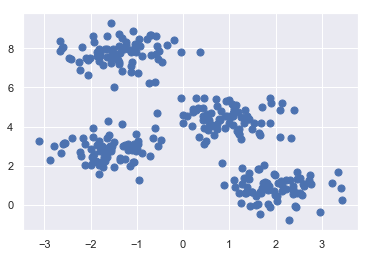

In [10]:
#Problem -Walmart wants to open the chain of stores across florida and want to find out the store location to optimize the revenue.
#Solution - Walmart can use its online customer data to analyse the customers loactions (Address) along with mothly sales.

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #for plot styling 
import numpy as np

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300,centers=4, cluster_std=0.60,random_state=0)
X.shape
y_true
plt.scatter(X[:,0],X[:,1],s=50);

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans=kmeans.predict(X)

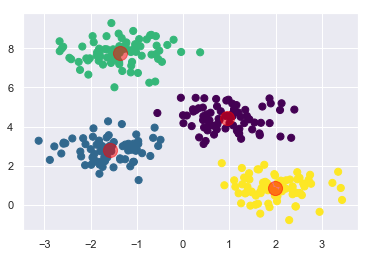

In [13]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    #1.Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers=X[i]
    
    while True:
        #2a. Assign lables based on closest center
        lables=pairwise_distances_argmin(X,centers)
        
        #2b. Find new centers from mean of points
        new_centers = np.array([X[lables == i].mean(0)
                               for i in range(n_clusters)])
        
        #2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers =new_centers
        
    return centers, lables  

centers, lables = find_clusters(X,4)

plt.scatter(X[:,0],X[:,1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:,0],centers[:,1], c= 'red', s=200, alpha=0.5);

In [ ]:
########################## Exercise #######################
    #Color comparision of flower image 

In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Evalution Metrics of Kmeans

Inertia -----

In [ ]:
# Inertia -----
# Recall the first property of clusters we covered above. This is what inertia evaluates. It tells us how far the points within 
# a cluster are. So, inertia actually calculates the sum of distances of all the points within a cluster from the centroid of 
# that cluster.

# We calculate this for all the clusters and the final inertial value is the sum of all these distances. This distance within 
# the clusters is known as intracluster distance. So, inertia gives us the sum of intracluster distances:

Dunn Index -- 

In [1]:
# the Dunn index also takes into account the distance between two clusters. This distance between the centroids of two different 
# clusters is known as inter-cluster distance. Letâ€™s look at the formula of the Dunn index:

# Dunn index is the ratio of the minimum of inter-cluster distances and maximum of intracluster distances.
# In order to maximize the value of the Dunn index, the numerator should be maximum. Here, we are taking the minimum of the 
# inter-cluster distances. So, the distance between even the closest clusters should be more which will eventually make sure 
# that the clusters are far away from each other.

Silhouette Coefficient = (x-y)/ max(x,y)
where, y is the mean intra cluster distance: mean distance to the other instances in the same cluster. 
x depicts mean nearest cluster distance i.e. mean distance to the instances of the next closest cluster.

The coefficient varies between -1 and 1. A value close to 1 implies that the instance is close to its cluster is a part of the right cluster. Whereas, a value close to -1 means that the value is assigned to the wrong cluster.